# Goodreads Book Ratings - Initial Data Exploration

#### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#### Import Data

In [5]:
ratings = pd.read_csv('../../ratings.csv')

In [6]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
n_ratings = len(ratings)
print('Number of ratings: {}'.format(n_ratings))

Number of ratings: 5976479


#### How many different users are there, and how many ratings have they given?

In [8]:
n_users = len(ratings.user_id.unique())
print('Number of unique users: {}'.format(n_users))

Number of unique users: 53424


In [9]:
user_freq = ratings.user_id.value_counts() # number of ratings for each user_id
user_freq.head()

30944    200
12874    200
52036    199
28158    199
12381    199
Name: user_id, dtype: int64

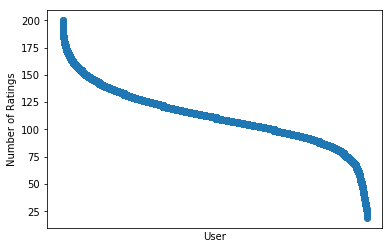

In [10]:
plt.scatter(range(len(user_freq)), user_freq)
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How many different items are there, and how many ratings do they have?

In [11]:
n_products = len(ratings.book_id.unique())
print('Number of unique items: {}'.format(n_products))

Number of unique items: 10000


In [12]:
product_freq = ratings.book_id.value_counts()
product_freq.head()

1    22806
2    21850
4    19088
3    16931
5    16604
Name: book_id, dtype: int64

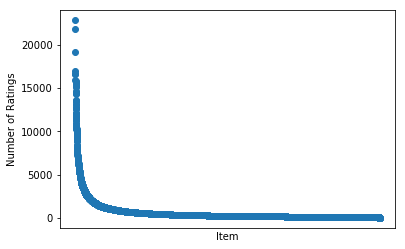

In [13]:
plt.scatter(range(len(product_freq)), product_freq)
plt.xlabel('Item')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How sparse is the data?

In [14]:
sparsity = (float(n_ratings) / (n_users * n_products)) * 100
print('Sparsity of ratings data: {0:.6f}%'.format(sparsity))

Sparsity of ratings data: 1.118688%


#### What are the ratings like? 

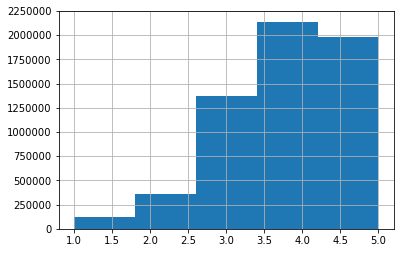

In [16]:
ratings.rating.hist(bins = 5)

It looks like there were more ratings of 4 or 5 than 1, 2 or 3. It looks like users were very reluctant to write a book a 1. This, however, may have to do with the fact that we are dealing with the most popular books on Goodreads, which are unlikely to be rated low.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001905149CF28>]], dtype=object)

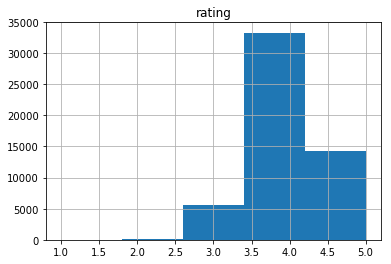

In [21]:
ratings[['user_id','rating']].groupby('user_id').mean().hist(bins=5)

Looking at the average ratings of each user, it looks like most are skewed towards 'positive' ratings, having a mean rating of about 4. Very few have a mean ranking below 3, and almost none below 2.